In [11]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import pandas_montecarlo
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
plt.style.use('seaborn-white')

In [12]:
df = pd.read_excel(r'C:\Users\Aleksander\Desktop\PANDAS.xlsx',parse_dates=True,index_col=0)

In [13]:
df = df.fillna(0)

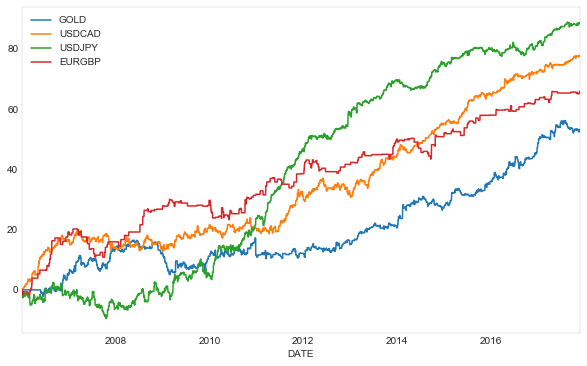

In [14]:
plt.rcParams['axes.linewidth'] = 0.1
(df.cumsum()*100).plot(figsize=(10,6))
plt.grid(False)

In [15]:
#df['Equal_W'] =(df.GOLD+df.USDCAD+df.USDJPY+df.EURGBP)*100
df['Equal_W'] =(0.80*df.GOLD+1.20*df.USDCAD+1*df.USDJPY+1*df.EURGBP)*100

In [16]:
#df.iloc[:,5][0] = 100000 + (100000  * df['Equal_W'][0])
hd = df.Equal_W[df.Equal_W != 0].dropna()

In [17]:
#for i in range(1,len(df.index)):
    #df.iloc[:,5][i] = df.iloc[:,5][i-1]  + (df.iloc[:,5][i-1]  * df.iloc[:,4][i])

290.226290659


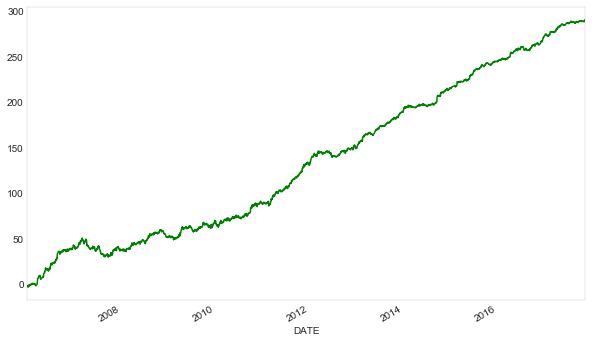

In [18]:
hd.cumsum().plot(figsize=(10,6),color='green')
print(hd.cumsum()[-1])

In [20]:
#SPY = pd.DataFrame(web.DataReader('SPY','yahoo',start=Returns.index[0],end=Returns.index[-1])['Adj Close'])
#SPY = (SPY.pct_change().dropna())*100

In [23]:
Returns = pd.DataFrame(hd)
Returns.columns = ['Returns']
Returns['Strategy'] = Returns.Returns.cumsum()

Returns['Rolling Volatility'] = pd.rolling_std(Returns.Returns, window=252) * np.sqrt(252)

Rolling = Returns.Returns.rolling(window=(252))
Returns['Rolling Sharpe'] = np.sqrt(252) * (Rolling.mean() / Rolling.std())

Returns['Cummax'] = Returns.Strategy.cummax()
Returns['Drawdown'] = (Returns.Cummax - Returns.Strategy)

mc = Returns.Returns.montecarlo(sims=100, bust=-0.1, goal=1)  

Returns.index = Returns.index.to_datetime()
Returns['Year'] = Returns.index.year
Returns['Month'] = Returns.index.month
Returns['Day'] = Returns.index.day

daily_rets = pd.pivot_table(Returns, index=['Day'], columns=['Month'], values=['Returns'],  aggfunc='sum')
daily_rets2 = pd.pivot_table(Returns, index=['Month'], columns=['Year'], values=['Returns'],  aggfunc='sum')

Year = Returns.groupby(by='Year').sum()['Returns']
Month = Returns.groupby(by='Month').sum()['Returns']
Day = Returns.groupby(by='Day').sum()['Returns']

SPY = pd.DataFrame(web.DataReader('SPY','yahoo',start=Returns.index[0],end=Returns.index[-1])['Adj Close'])
SPY = SPY.pct_change().dropna()
To = SPY.merge(Returns,how='outer',left_index=True,right_index=True)
To = To.fillna(0)

data = To[['Adj Close','Returns']]
data.index.name = 'Date'
data.columns = ['S&P500','Strategy']

X = sm.add_constant(data['S&P500'], prepend=False)
ols = sm.OLS(data['Strategy'], X).fit()
beta = ols.params
y_fit = [X.min().dot(beta), X.max().dot(beta)]

s = Returns.Returns
n = 252

#lenght = len(df.GOLD[df.GOLD!=0]) + len(df.USDCAD[df.USDCAD!=0]) + len(df.USDJPY[df.USDJPY!=0]) + len(df.EURGBP[df.EURGBP!=0])
#wins = len(df.GOLD[df.GOLD>0]) + len(df.USDCAD[df.USDCAD>0]) + len(df.USDJPY[df.USDJPY>0]) + len(df.EURGBP[df.EURGBP>0])
#loss = len(df.GOLD[df.GOLD<0]) + len(df.USDCAD[df.USDCAD<0]) + len(df.USDJPY[df.USDJPY<0]) + len(df.EURGBP[df.EURGBP<0])

#cnt = lenght
#wins = wins
#losses = loss
mean_w = round(s[s>0].mean(), 2)
mean_l = round(s[s<0].mean(), 2)
#win_r = round(float(wins)/float(cnt), 2)*100
mean_trd = round(s.mean(), 2)
sd = round(np.std(s), 2)
max_l = round(s.min(), 2)
max_w = round(s.max(), 2)
sharpe_r =  round((np.sqrt(n) * (np.mean(s)) / np.std(s)),2)
sortino_r = round((np.sqrt(n) * (np.mean(s)) / np.std(s[s < 0])), 2)
max_drawdown = round(Returns['Drawdown'].max(), 2)

C:\Users\Aleksander\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  """


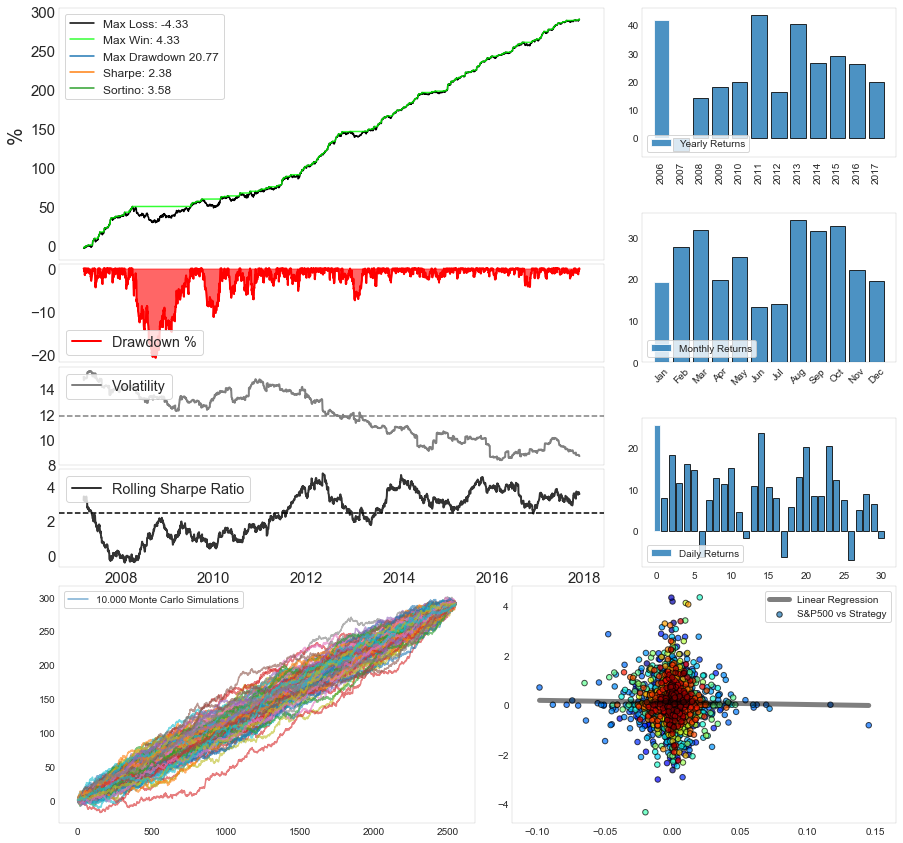

In [41]:
plt.style.use('seaborn-white')
              
plt.figure(figsize=(15,15))
plt.rcParams['axes.linewidth'] = 0.1

ax1 = plt.subplot2grid((32,26), (0,0), rowspan=10, colspan=17)
plt.yticks(fontsize=15)
ax2 = plt.subplot2grid((32,26), (10,0), rowspan=4, colspan=17)
plt.yticks(fontsize=15)
ax3 = plt.subplot2grid((32,26), (14,0), rowspan=4, colspan=17)
plt.yticks(fontsize=15)
ax4 = plt.subplot2grid((32,26), (18,0), rowspan=4, colspan=17)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax5 = plt.subplot2grid((32,26), (0,18), rowspan=6, colspan=8)
ax6 = plt.subplot2grid((32,26), (8,18), rowspan=6, colspan=8)
ax7 = plt.subplot2grid((32,26), (16,18), rowspan=6, colspan=8)
ax8 = plt.subplot2grid((34,26), (24,14), rowspan=10, colspan=13)
ax9 = plt.subplot2grid((34,26), (24,0), rowspan=10, colspan=13)

ax1.plot(Returns.Strategy,color='black', label='')
ax1.plot(Returns.Cummax, color='lime', label='',alpha=0.8)
ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([]),ax1.plot([])
ax1.legend((#'Trades: '+str(cnt),
            #'Wins: '+str(wins),
            #'Losses: '+str(losses),
            #'Winrate: '+str(win_r),
            #'Mean Return: '+str(mean_trd),
            'Max Loss: '+str(max_l),
            'Max Win: '+str(max_w),
            'Max Drawdown '+str(max_drawdown),
            'Sharpe: '+str(sharpe_r),
            'Sortino: '+str(sortino_r)),loc=2,frameon=1,fontsize='large')

ax1.grid(False)
ax1.set_xticks([])
ax1.set_ylabel('%', fontsize=20)


ax2.plot(-Returns['Drawdown'], color = 'red',lw=2, label='Drawdown %')
ax2.fill_between(Returns.index, -Returns.Drawdown, color = 'red',alpha=0.6)
ax2.legend(loc=3,frameon=1,fontsize='x-large')
ax2.grid(False)
ax2.set_xticks([])


ax3.plot(Returns['Rolling Volatility'],color = 'grey',lw=2, label='Volatility')
ax3.legend(loc=2,frameon=1,fontsize='x-large')
ax3.grid(False)
ax3.set_xticks([])
ax3.axhline(Returns['Rolling Volatility'].mean(),ls='--',color='grey')


ax4.plot(Returns['Rolling Sharpe'],color = 'black',lw=2, label='Rolling Sharpe Ratio',alpha=0.8)
ax4.legend(loc=2,frameon=1,fontsize='x-large')
ax4.grid(False)
ax4.axhline(Returns['Rolling Sharpe'].mean(),ls='--',color='k')



ax5.bar(np.arange(len(Year.index)),Year,edgecolor='white',label='Yearly Returns',tick_label=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],alpha=0.8)
ax5.set_xticklabels(['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],rotation=90)
ax5.legend(loc=3,frameon=1)

ax6.bar(np.arange(len(Month.index)),Month,edgecolor='white',label='Monthly Returns',tick_label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                 'Sep','Oct','Nov','Dec'],alpha=0.8)
ax6.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                 'Sep','Oct','Nov','Dec'],rotation=45)
ax6.legend(loc=3,frameon=1)

ax7.bar(np.arange(len(Day.index)),Day,edgecolor='white',label='Daily Returns',alpha=0.8)
ax7.legend(loc=3,frameon=1)


colors = np.linspace(0.1,1,len(data)) #We use this to get different colors in the scatterplot
ax8.scatter(data['S&P500'],data['Strategy'], s = 30, c = colors, cmap = plt.get_cmap ('jet'),
                 edgecolor='k', alpha = 0.7,label='S&P500 vs Strategy')
ax8.plot([X.min()[0], X.max()[0]], y_fit, '-', lw=5, label = 'Linear Regression', alpha=0.5,c='k')
ax8.legend(frameon=1)
ax8.grid(False)

ax9.plot(mc.data.cumsum(),alpha=0.6)
ax9.legend(['10.000 Monte Carlo Simulations'],frameon=1)
ax9.grid(False)
plt.savefig('C:\Users\Aleksander\Desktop\SPY.png',dpi=300)

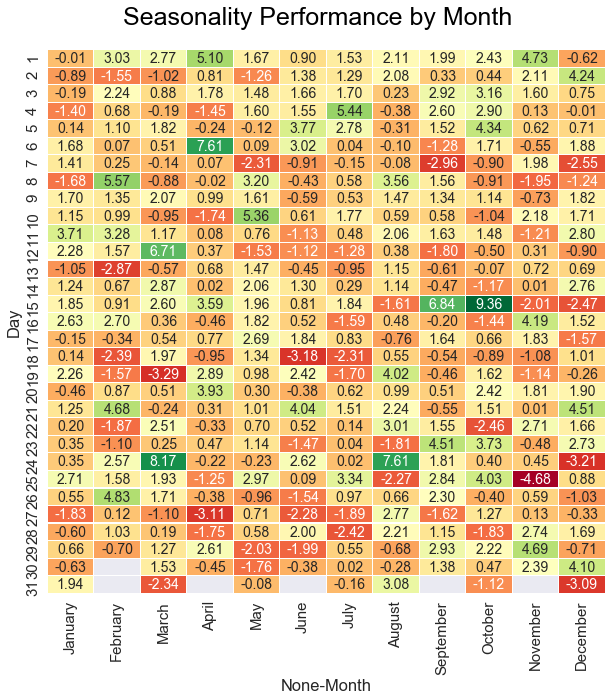

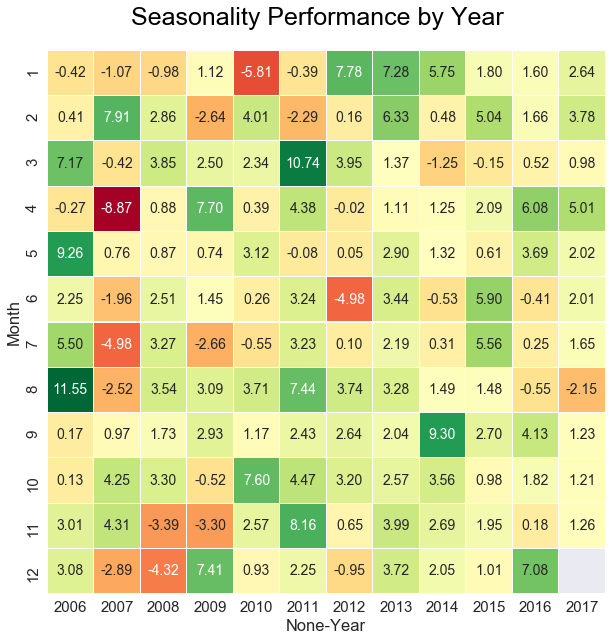

In [ ]:


xticks = ['January','February','March','April','May','June','July','August',
                 'September','October','November','December']

plt.figure(figsize=(10,10))
plt.suptitle('Seasonality Performance by Month', fontsize=25, color='k',y=0.94)
sns.set(font_scale=1.5)
sns.heatmap(daily_rets,cmap='RdYlGn',linewidths=0.1,annot=True, 
            fmt='.2f',annot_kws={"size": 14}, cbar=False,xticklabels=xticks);

xticks2 = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

plt.figure(figsize=(10,10))
plt.suptitle('Seasonality Performance by Year', fontsize=25, color='k',y=0.94)
sns.set(font_scale=1.5)
sns.heatmap(daily_rets2,cmap='RdYlGn',linewidths=0.1,annot=True, 
            fmt='.2f',annot_kws={"size": 14}, cbar=False,xticklabels=xticks2);

1.81567720174
[ 0.20269971  0.30622431  0.24341022  0.24766576]


([], <a list of 0 Text yticklabel objects>)

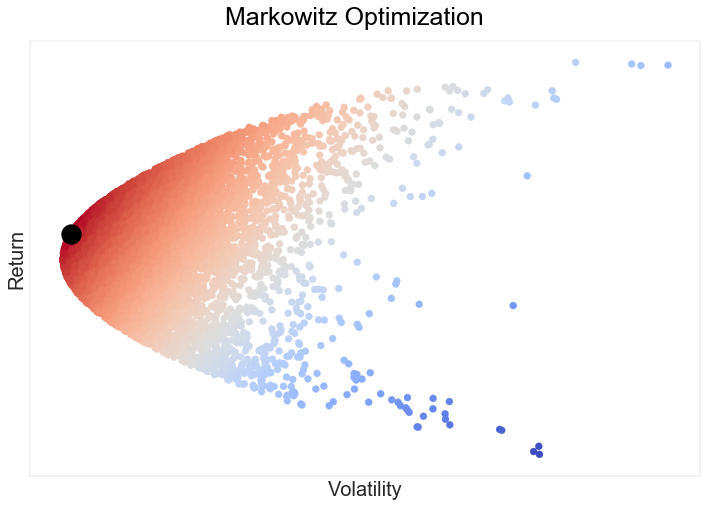

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

plt.style.use('seaborn-white')
              
#plt.figure(figsize=(15,15))
plt.rcParams['axes.linewidth'] = 0.1

TT = df[['GOLD','USDCAD','USDJPY','EURGBP']]

################################

num_ports = 10000
all_weights = np.zeros((num_ports,4))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum(weights*TT.mean()*252)*100
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(TT.cov()*252,weights)))*100
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    
################################
    
    
print(sharpe_arr.max())
location = sharpe_arr.argmax()
print(all_weights[location,:])

plt.figure(figsize=(12,8))
plt.suptitle('Markowitz Optimization', fontsize=25, color='k',y=0.94)
plt.scatter(vol_arr,ret_arr, c=sharpe_arr,cmap='coolwarm')
#plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility',fontsize=20)
plt.ylabel('Return',fontsize=20)
plt.grid(False)
plt.scatter(vol_arr[location],ret_arr[location], c='k', s=400,edgecolors='k')
plt.xticks([])
plt.yticks([])

In [188]:
TT = df[['GOLD','USDCAD','USDJPY','EURGBP']]

In [189]:
TT.corr()

,GOLD,USDCAD,USDJPY,EURGBP
GOLD,1.000000,-0.049015,-0.020191,0.005892
USDCAD,-0.049015,1.000000,0.008783,0.040003
USDJPY,-0.020191,0.008783,1.000000,0.001977
EURGBP,0.005892,0.040003,0.001977,1.000000


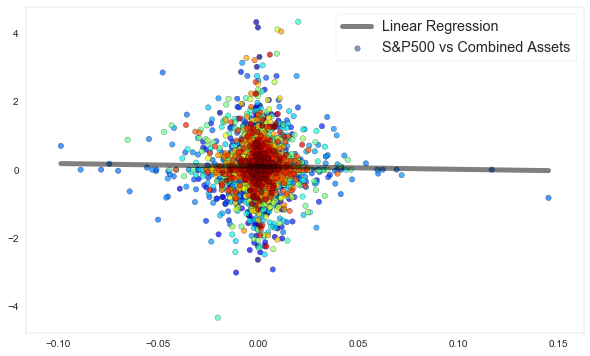

In [190]:
plt.figure(figsize=(10,6))
colors = np.linspace(0.1,1,len(data)) #We use this to get different colors in the scatterplot
plt.scatter(data['S&P500'],data['Strategy'], s = 30, c = colors, cmap = plt.get_cmap ('jet'),
                 edgecolor='k', alpha = 0.7,label='S&P500 vs Combined Assets')
plt.plot([X.min()[0], X.max()[0]], y_fit, '-', lw=5, label = 'Linear Regression', alpha=0.5,c='k')
plt.legend(frameon=1,fontsize='large')
plt.grid(False)

In [464]:
df.loc['XAUUSD']['AVERAGE'] = 2.66

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 8 Text yticklabel objects>)

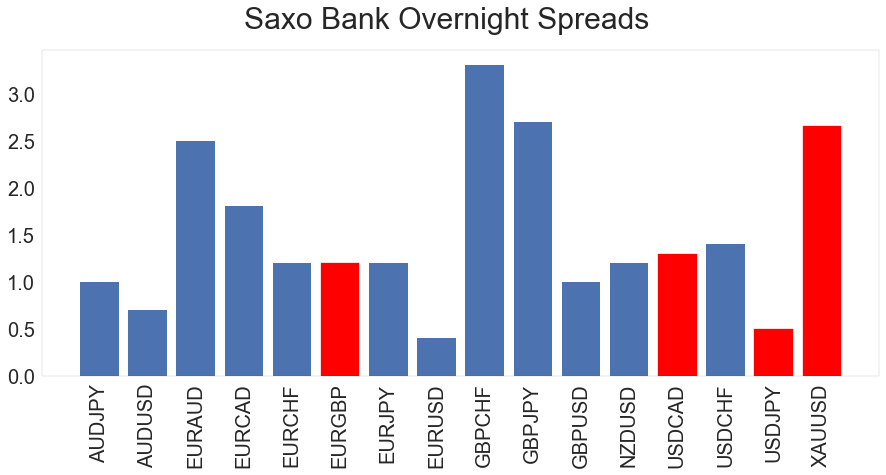

In [501]:
plt.style.use('seaborn-white')
plt.rcParams['axes.linewidth'] = 0.1

colors = ['black','black','black','black','black','black','black','black','black','black','black',
         'black','black','black','red','red']

#df.plot(kind='bar',figsize=(18,8),fontsize=20,color= colors,alpha=0.6,width=0.5)
plt.figure(figsize=(15,6))
ty = plt.bar(np.arange(len(df)), df.AVERAGE)
ty[5].set_color('r')
ty[12].set_color('r')
ty[14].set_color('r')
ty[15].set_color('r')
plt.suptitle('Saxo Bank Overnight Spreads',fontsize=30)
plt.legend(fontsize='large')
plt.xticks(np.arange(len(df)),('AUDJPY',
'AUDUSD',
'EURAUD',
'EURCAD',
'EURCHF',
'EURGBP',
'EURJPY',
'EURUSD',
'GBPCHF',
'GBPJPY',
'GBPUSD',
'NZDUSD',
'USDCAD',
'USDCHF',
'USDJPY',
'XAUUSD'
),rotation=90,fontsize=20);
plt.yticks(fontsize=20)

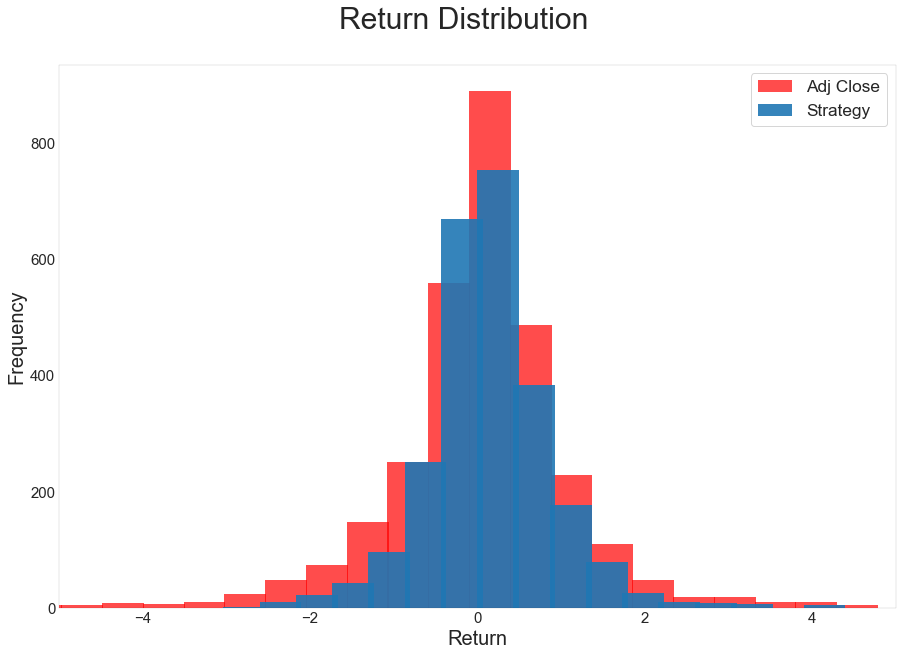

In [258]:

SPY.plot(kind='hist',bins=50,alpha=0.7,width=0.5,figsize=(15,10),color='red',label='S&P500')
hd.plot(kind='hist',bins=20,alpha=0.9,width=0.5,label='Strategy')
plt.suptitle('Return Distribution',fontsize=30,y=0.96)
plt.xlim(-5,5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Return',fontsize=20)
plt.legend(frameon=1,fontsize='xx-large')

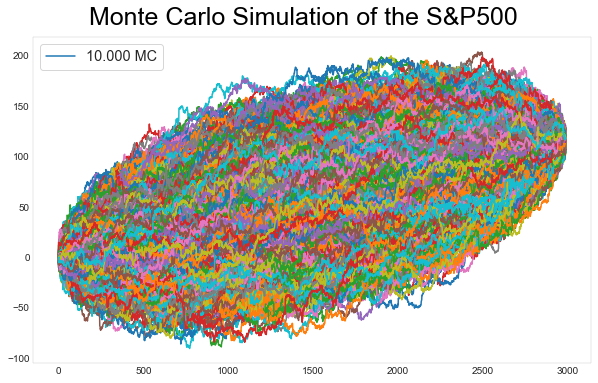

In [104]:
SPY = pd.DataFrame(web.DataReader('SPY','yahoo',start=Returns.index[0],end=Returns.index[-1])['Adj Close'])
SPY['Return'] = (SPY.pct_change().dropna())*100

mc = SPY.Return.montecarlo(sims=10000, bust=-0.1, goal=1) 

plt.figure(figsize=(10,6))
plt.suptitle('Monte Carlo Simulation of the S&P500', fontsize=25, color='k',y=0.95)
plt.plot(mc.data.cumsum(),alpha=1)
plt.legend(['10.000 MC'],frameon=1,fontsize='x-large')
plt.grid(False)